# K Nearest Neighbors
## Description
- Uses Euclidean distant to classify input into groups
- Can be multidimensional
- 'K' signifies number 'neighbors' used to classify input
- If groups of classifications are even, K should at least be (no_of_groups + 1)
- If groups of classifications are odd, K should at least be (no_of_groups + 2)
- Can give confidence score

Cons
- Doesnt scale well since it needs all data points to compute euclidean distances

In [16]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[5,2,1,2,1,2,3,3,1]])
example_measures = example_measures.reshape(len(example_measures),-1)

prediction = clf.predict(example_measures)
print(prediction)

0.9857142857142858
[2 2]


## Algorithm & Understanding
Based on Euclidean Distance (Named after Euclide, father of geometry, Euclids Elements)

\begin{equation*}
\sqrt{\sum_{i=1}^n (q_{i} - p_{i})^{2}}
\end{equation*}

i.e if q = (1, 3)  and p = (2, 5)

\begin{equation*}
\sqrt{((1 - 2)^2 + (3 - 5)^2)
\end{equation*}

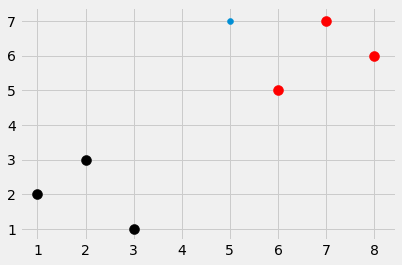

[('r', 3)]
r


In [28]:
## Coding KNN from Scratch
#### Base case in Python
import numpy as np
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

dataset = {'k' : [[1,2], [2,3], [3,1]], 'r': [[6,5], [7,7], [8,6]]}
new_features = [5,7]

[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1])
plt.show()

def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warning.warn('K is set to value less than total voting group!')
    distances = []
    
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes = [i[1] for i in sorted(distances) [:k]]
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result
    
result = k_nearest_neighbors(dataset, new_features, k = 3)

print(result)